In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Seaborn styling
sns.set(style='whitegrid')


In [2]:
# File paths for training, test, and solution data
train_file_path = r'C:\python\moviegenre\Genre Classification Dataset\train_data.txt'
test_file_path = r'C:\python\moviegenre\Genre Classification Dataset\test_data.txt'
solution_file_path = r'C:\python\moviegenre\Genre Classification Dataset\test_data_solution.txt'

In [3]:
# Reading data
train_df = pd.read_csv(train_file_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
test_df = pd.read_csv(test_file_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')
solution_df = pd.read_csv(solution_file_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')

In [4]:
# Adjust solution DataFrame
solution_df = solution_df.rename(columns={"Title": "Actual Genre"}).drop(columns=["Description"])


In [5]:
# Corrected genre distribution visualization
genre_counts = train_df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

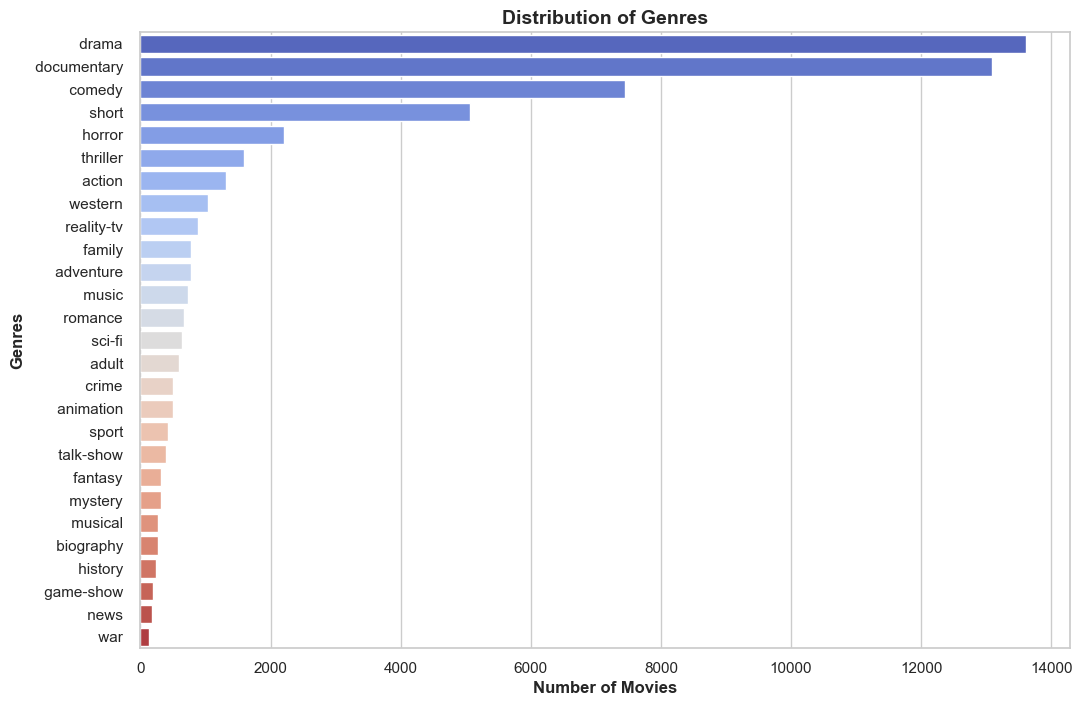

In [6]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=genre_counts,
    x='Count',  # Numeric axis
    y='Genre',  # Categorical axis
    palette='coolwarm'  # Using a different color palette
)
plt.xlabel("Number of Movies", fontsize=12, fontweight='bold')
plt.ylabel("Genres", fontsize=12, fontweight='bold')
plt.title("Distribution of Genres", fontsize=14, fontweight='bold')
plt.show()

In [7]:
# Text cleaning
stop_words = set(stopwords.words('english'))

In [8]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs, Twitter handles, and non-alphabetic characters
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r"[^a-z\s]", '', text)
    words = nltk.word_tokenize(text)  # Tokenization
    # Remove stopwords and short words
    filtered_words = [word for word in words if word not in stop_words and len(word) > 2]
    return " ".join(filtered_words)


In [9]:
# Applying text cleaning
train_df["cleaned_text"] = train_df["Description"].apply(clean_text)
test_df["cleaned_text"] = test_df["Description"].apply(clean_text)

In [10]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_df["cleaned_text"])
X_test = tfidf_vectorizer.transform(test_df["cleaned_text"])


In [11]:
# Splitting the data for training and validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train,
    train_df["Genre"],
    test_size=0.2,
    random_state=42
)

In [12]:
# Train the Logistic Regression model
logistic_regression = LogisticRegression(multi_class='multinomial', solver='saga')
logistic_regression.fit(X_train_split, y_train_split)


LogisticRegression(multi_class='multinomial', solver='saga')

In [13]:
# Validate and evaluate the Logistic Regression model
y_val_pred_lr = logistic_regression.predict(X_val_split)
accuracy_lr = accuracy_score(y_val_split, y_val_pred_lr)

print("Logistic Regression Validation Accuracy:", accuracy_lr)
print(classification_report(y_val_split, y_val_pred_lr))

# Prediction on test data
test_df["Predicted_Genre_LR"] = logistic_regression.predict(X_test)

# Ensure 'Id' column exists and is consistent in both dataframes
test_df['Id'] = test_df['Id'].astype(str)  # Convert to string
solution_df['Id'] = solution_df['Id'].astype(str)  # Convert 'Id' column to string

# Add actual genre information to the test data
# Ensure 'Actual Genre' is the correct column name
solution_df = solution_df.rename(columns={"Title": "Actual Genre"})

# Merge on 'Id', keeping only the necessary columns
test_df = test_df.merge(solution_df[['Id', 'Actual Genre']], on='Id', how='left')



Logistic Regression Validation Accuracy: 0.5763165175689385


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

               precision    recall  f1-score   support

      action        0.62      0.21      0.32       263
       adult        0.86      0.16      0.27       112
   adventure        0.48      0.11      0.18       139
   animation        1.00      0.01      0.02       104
   biography        0.00      0.00      0.00        61
      comedy        0.51      0.58      0.54      1443
       crime        1.00      0.01      0.02       107
 documentary        0.65      0.87      0.74      2659
       drama        0.53      0.81      0.64      2697
      family        0.47      0.05      0.08       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.92      0.30      0.45        40
     history        0.00      0.00      0.00        45
      horror        0.67      0.53      0.59       431
       music        0.70      0.38      0.49       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n